# More difficult problems

# Load Tools

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix

def plot_cm(mat):
  classes = np.arange(cm.shape[0])
  plt.imshow(mat, cmap=plt.cm.Blues)
  for (j,i),label in np.ndenumerate(mat):
    plt.text(i,j,np.round(label,2),ha='center',va='center')

  plt.colorbar()
  plt.title('Confusion Matrix')
  plt.xlabel('True label')
  plt.ylabel('Pred label')
  plt.xticks(classes)
  plt.yticks(classes)
  plt.show()

# Mock Data

Shapes: X= (300, 2) y = (300,) 


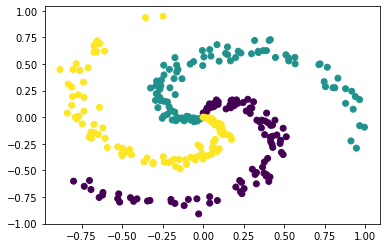

In [3]:
N = 100 # number of points per class
K = 3   # number of classes

X = np.zeros((N*K, 2)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

print('Shapes: X= {} y = {} '. format(X.shape, y.shape))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

The main challenge with such data is the *non-linear* structure. Therefore we need some non-linear tools

**Quiz**: How many variables? How many labels? How many samples ?

# From Neurons to Networks

## Adding Layers and Non-Linearities

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/ANN_ReLU.jpg",  width="1200">
</div>

In [15]:
nc = 3 # number of classes
loss_name='sparse_categorical_crossentropy'   # for integer labels
acc='sparse_categorical_accuracy'             # additional metrics to track

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_dim=2))
#model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(nc, activation='softmax'))

model.compile(optimizer='sgd', loss=loss_name, metrics=[acc])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
 dense_3 (Dense)             (None, 3)                 27        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


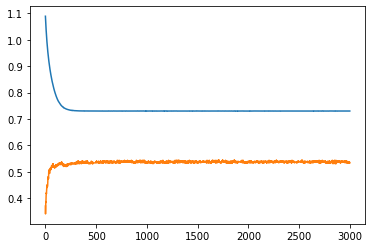

In [16]:
fh = model.fit(X,y, epochs=300, verbose=0)
plt.plot(fh.history['loss'][1:])
plt.plot(fh.history[acc][1:])
plt.show()

[loss, accuracy] =  [0.7294607758522034, 0.5333333611488342]


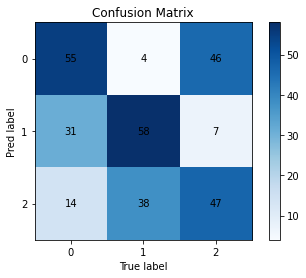

In [17]:
eval = model.evaluate(x=X, y=y, verbose=0)
print('[loss, accuracy] = ', eval)

yp = model.predict(X)
yp1 = np.argmax(yp, axis=1)

cm = confusion_matrix(yp1, y)
plot_cm(cm)

## Saving Models

Fitting is expensive. It's good practice to save good models. They can be shared or reloaded later - with all parameters in place.

In [18]:
# save: will create a directory of specified name
model.save('model2')

# load
model2 = tf.keras.models.load_model('model2')

INFO:tensorflow:Assets written to: model2/assets


## Group Task (30 min): Changing and comparing models

You may have to rerun the fit for a more decent performance than in the lecture.

Make sure have saved your best model as "model1"

- **Group 1:** **Remove the non-linear activation layer** from the model and save the resulting model as model2. 

- **Group 2:** **Add an additional layer** with non-linear activation function (e.g. 'relu') before the final output layer and save the resulting model as model 2.

Report your results back to all. Summarize the model. What can you say about the performance on the training data? 

The code cell below should be ready to go without further editing. It may help to visualize differences between the two models, but it requires two distinct models named "model1" and "model2"




### Decision Boundaries

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


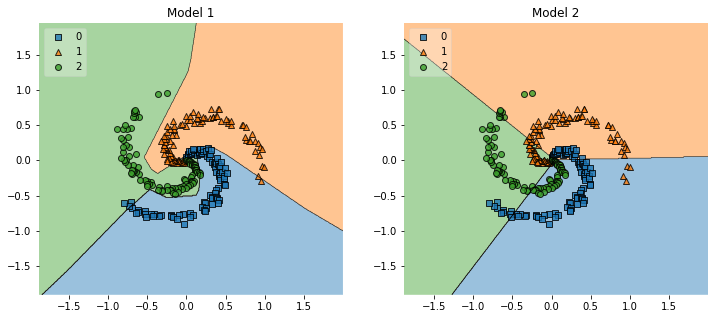

In [19]:
# Vizualizing Decision Boundaries
# This is feasible only for 2D data in higher dim it becomes useless
from mlxtend.plotting import plot_decision_regions

# Trick from http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
# see Example 12

class Onehot2Int(object):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)


plt.figure(figsize=(12, 5))

model1 = tf.keras.models.load_model('model1')
model1_adj = Onehot2Int(model1)
ax = plt.subplot(1, 2, 1)
plot_decision_regions(X, y, clf=model1_adj, legend=2)
plt.title('Model 1')

model2 = tf.keras.models.load_model('model2')
model2_adj = Onehot2Int(model2)
ax = plt.subplot(1, 2, 2)
plot_decision_regions(X, y, clf=model2_adj, legend=2)
plt.title('Model 2')

plt.show()

**Lesson**: 
The problem was more difficult because the data has non-linear patterns.

- Simple non-linear activation functions may help to separate more complex data structures.
- We need to protect against over-fitting

# Summary of the first part

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/ANN_001_Summary.jpg",  width="1000">
</div>